2020.10.13
分析了三个数据集1,6,7
接下来再找一个分析就行

## Before all tasks begin, import frequently used libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset1 4000-most-common-english-words

In [3]:
_most = pd.read_csv('data/4000-most-common-english-words-csv.csv')
_most.columns = ['words']
_most.head(10)

,words
0,the
1,be
2,and
3,of
4,a
5,in
6,to
7,have
8,it
9,I


In [4]:
_most.describe()

,words
count,4341
unique,4341
top,effort
freq,1


In [5]:
_most.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   4341 non-null   object
dtypes: object(1)
memory usage: 34.0+ KB


After observing the data, I found that the data content is not much. Contains only the most commonly used 4341 words, no other attributes.

In response to this situation, I still raised a question. We call words with more than 8 letters as long words, and words with no more than 8 letters as short words.

question：
1. Are there many long words or short words in high-frequency words?
2. The data set is divided into training set and test set for learning, and machine learning methods are used to complete the classification task.

Since the data in the dataset is relatively simple, I will label the data myself. That is, words with more than 8 letters are long words, and words with no more than 8 letters are short words.

First, we count the length of each word and add this length as a piece of attribute information to the data set.

In [6]:
_most1 = _most.values.tolist()

In [7]:
word_len = []
for i in range(len(_most)):
    _len = len(_most1[i][0])
    word_len.append(str(_len))

_most['num']=word_len
_most.head()

,words,num
0,the,3
1,be,2
2,and,3
3,of,2
4,a,1


In [8]:
train_data_1 = _most.iloc[:int(0.8*len(_most))]
test_data_1 = _most.iloc[int(0.8*len(_most)):]
train_data_1.head(10)

,words,num
0,the,3
1,be,2
2,and,3
3,of,2
4,a,1
5,in,2
6,to,2
7,have,4
8,it,2
9,I,1


Next, I mark the words with num greater than 8 as long words, and those with num less than or equal to 8 as short words.

In [9]:
train_data_11 = train_data_1.values.tolist()
_most2 = _most.values.tolist()

In [10]:
l_or_s = []
t = 'true'
f = 'false'
for i in range(len(train_data_1)):
    if int(train_data_11[i][1]) > 8:
        l_or_s.append(t)
    else:
        l_or_s.append(f)
train_data_1['target'] = l_or_s
train_data_1.head(10)

C:\Users\14675\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,words,num,target
0,the,3,false
1,be,2,false
2,and,3,false
3,of,2,false
4,a,1,false
5,in,2,false
6,to,2,false
7,have,4,false
8,it,2,false
9,I,1,false


In [11]:
l_or_s = []
t = 'true'
f = 'false'
for i in range(len(_most2)):
    if int(_most2[i][1]) > 8:
        l_or_s.append(t)
    else:
        l_or_s.append(f)
_most['target'] = l_or_s
_most.head(10)

,words,num,target
0,the,3,false
1,be,2,false
2,and,3,false
3,of,2,false
4,a,1,false
5,in,2,false
6,to,2,false
7,have,4,false
8,it,2,false
9,I,1,false


In [12]:
_most.describe()

,words,num,target
count,4341,4341,4341
unique,4341,15,2
top,effort,5,false
freq,1,686,3407


In [13]:
all_target1 = _most['target'].tolist()

In [14]:
def count_sum(target):
    x = 0
    y = 0
    for i in target:
        if i == 'true':
            x += 1
        else:
            y += 1
    return x,y

In [15]:
x1,y1 = count_sum(all_target1)

C:\Users\14675\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'nums')

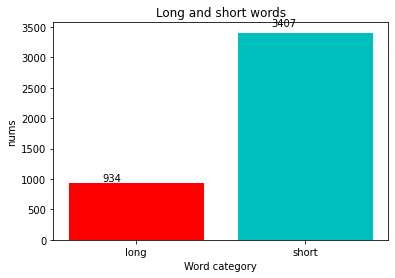

In [16]:
# 显示高度
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.2, 1.03*height, '%s' % int(height))


label = ['long','short']
value = [x1,y1]
autolabel(plt.bar(label,value,color='rc'))
plt.title('Long and short words')

plt.xlabel('Word category')
plt.ylabel('nums')

### It can be seen that the proportion of short words in high-frequency words is high.

In [17]:
train_data_1.describe()

,words,num,target
count,3472,3472,3472
unique,3472,15,2
top,effort,6,false
freq,1,560,2781


At this point, I processed the data set into what I wanted.

Next, I use the matplotlib module to count and visualize the number of long and short words.

In [18]:
target1 = train_data_1['target']

In [19]:
target1.shape

(3472,)

In [62]:
for i in range(len(train_data_1['words'])):
    train_data_1['words'][i]=i
    
train_data_1

C:\Users\14675\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,words,num,target
0,0,3,false
1,1,2,false
2,2,3,false
3,3,2,false
4,4,1,false
...,...,...,...
3467,3467,9,true
3468,3468,6,false
3469,3469,13,true
3470,3470,4,false


In [63]:
data1 = train_data_1[['words','num']]
# pre = []
# for i in range(3472):
#     pre.append(i)
# # for i in data1:
# #     pre = i[0][0]
# # pre
# data1['index1'] = pre
data1
# pre

,words,num
0,0,3
1,1,2
2,2,3
3,3,2
4,4,1
...,...,...
3467,3467,9
3468,3468,6
3469,3469,13
3470,3470,4


In [64]:
data1.shape

(3472, 2)

In [67]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
result = model.fit(data1, target1)
result

DecisionTreeClassifier()

In [77]:
j = 0
for i in range(3472,4341):
    test_data_1['words'][i]=j
    j+=1
test_data_1

C:\Users\14675\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,words,num
3472,0,7
3473,1,6
3474,2,7
3475,3,7
3476,4,6
...,...,...
4336,864,4
4337,865,5
4338,866,6
4339,867,8


In [73]:
length = len(test_data_1['words'])
length

869

In [75]:
test_data_1['words'][4340]

'dictate'

In [79]:
pred_target = result.predict(test_data_1)
pred_target

array(['false', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'true', 'false', 'false', 'true', 'false', 'false',
       'true', 'true', 'false', 'false', 'false', 'true', 'false',
       'false', 'true', 'true', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'true', 'false', 'true', 'false',
       'false', 'true', 'false', 'false', 'true', 'true', 'false',
       'false', 'true', 'true', 'false', 'false', 'false', 'false',
       'false', 'false', 'true', 'false', 'true', 'true', 'false',
       'false', 'false', 'false', 'true', 'false', 'false', 'false',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'true', 'false', 'false', 'true', 'false', 'false', 'false',
       'false', 'true', 'true', 'false', 'true', 'false', 'false',
       'false', 'true', 'false', 'false', 'false', 'false', 'false',
       'true', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'true', 'tr

In [81]:
test_data_t = _most.iloc[int(0.8*len(_most)):]
test_data_t

,words,num,target
3472,confess,7,false
3473,racism,6,false
3474,starter,7,false
3475,banking,7,false
3476,casual,6,false
...,...,...,...
4336,spit,4,false
4337,kneel,5,false
4338,vacuum,6,false
4339,selected,8,false


In [88]:
test_t_target = test_data_t['target']
test_t_target = np.array(test_t_target)
test_t_target

array(['false', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'true', 'false', 'false', 'true', 'false', 'false',
       'true', 'true', 'false', 'false', 'false', 'true', 'false',
       'false', 'true', 'true', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'true', 'false', 'true', 'false',
       'false', 'true', 'false', 'false', 'true', 'true', 'false',
       'false', 'true', 'true', 'false', 'false', 'false', 'false',
       'false', 'false', 'true', 'false', 'true', 'true', 'false',
       'false', 'false', 'false', 'true', 'false', 'false', 'false',
       'false', 'false', 'false', 'false', 'false', 'false', 'false',
       'true', 'false', 'false', 'true', 'false', 'false', 'false',
       'false', 'true', 'true', 'false', 'true', 'false', 'false',
       'false', 'true', 'false', 'false', 'false', 'false', 'false',
       'true', 'false', 'false', 'false', 'false', 'false', 'false',
       'false', 'false', 'false', 'true', 'tr

In [91]:

acc_count = 0
err_count = 0
for i in range(len(pred_target)):
    if pred_target[i] == test_t_target[i]:
        acc_count += 1
    else:
        err_count += 1
acc = acc_count/(acc_count+err_count)
acc

1.0

### Due to the small amount of data and only one attribute, the classifier we used produced excellent results, reaching 100% accuracy.

## Dataset2 Airplane_Crashes_and_Fatalities_Since_1908

**Since the data of the first data set is relatively simple, there is less information that can be directly mined.**

**We start to mine the next data set.**

In [48]:
_Airplane = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908.csv')
_Airplane.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [49]:
_Airplane.index = _Airplane.index + 1

In [50]:
_Airplane.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
1,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
2,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [13]:
_Airplane.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [14]:
_Airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


## Dataset3: countries of the world

In [16]:
_countries = pd.read_csv('data/countries of the world.csv')
_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [17]:
_countries.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [18]:
_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

## Dataset4:datasets_800154_1372289_estonia-passenger-list

In [20]:
_passenger = pd.read_csv('data/datasets_800154_1372289_estonia-passenger-list.csv')
_passenger.head(10)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
5,6,Sweden,GERD INGA MAGNHILD,AHLSTROM,F,71,P,0
6,7,Sweden,HJALMAR,AHLSTROM,M,60,P,0
7,8,Estonia,PILLE,AHMAN,F,18,P,0
8,9,Estonia,TORMI,AINSALU,M,30,C,0
9,10,Sweden,ANNA MARIA,ALDRIN,F,63,P,0


In [21]:
_passenger.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [22]:
_passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [23]:
_smoking = pd.read_csv('data/smokingprevalence.csv')
_smoking.head(10)

,Entity,Code,Year,Prevalence (%)
0,Afghanistan,AFG,1980,10.4
1,Afghanistan,AFG,1981,10.5
2,Afghanistan,AFG,1982,10.5
3,Afghanistan,AFG,1983,10.5
4,Afghanistan,AFG,1984,10.6
5,Afghanistan,AFG,1985,10.6
6,Afghanistan,AFG,1986,10.6
7,Afghanistan,AFG,1987,10.7
8,Afghanistan,AFG,1988,10.7
9,Afghanistan,AFG,1989,10.8


In [24]:
_smoking.describe()

,Year,Prevalence (%)
count,6204.000000,6204.000000
mean,1996.000000,18.988878
std,9.522672,9.181818
min,1980.000000,3.000000
25%,1988.000000,11.000000
50%,1996.000000,18.500000
75%,2004.000000,26.100000
max,2012.000000,50.599998


In [26]:
_smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6204 entries, 0 to 6203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          6204 non-null   object 
 1   Code            6171 non-null   object 
 2   Year            6204 non-null   int64  
 3   Prevalence (%)  6204 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 194.0+ KB


## Dataset5: pricecigarettes

In [27]:
_pricecigarettes = pd.read_csv('data/pricecigarettes.csv')
_pricecigarettes.head(10)

,Entity,Code,Year,Indicator:Average - cigarette price in international dollars (international-$)
0,Algeria,DZA,2012,1.84
1,Algeria,DZA,2014,2.09
2,Argentina,ARG,2012,2.79
3,Argentina,ARG,2014,3.47
4,Armenia,ARM,2012,1.69
5,Armenia,ARM,2014,1.74
6,Australia,AUS,2012,8.24
7,Australia,AUS,2014,10.64
8,Austria,AUT,2012,4.97
9,Austria,AUT,2014,5.34


In [28]:
_pricecigarettes.describe()

,Year,Indicator:Average - cigarette price in international dollars (international-$)
count,208.000000,208.000000
mean,2013.019231,4.336394
std,1.002227,2.534659
min,2012.000000,0.000000
25%,2012.000000,2.195000
50%,2014.000000,4.155000
75%,2014.000000,5.767500
max,2014.000000,13.000000


In [29]:
_pricecigarettes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Entity                                                                           208 non-null    object 
 1   Code                                                                             208 non-null    object 
 2   Year                                                                             208 non-null    int64  
 3   Indicator:Average -  cigarette price in international dollars (international-$)  208 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.6+ KB


## Dataset6: titanic3

In this data set, because the data set is relatively rich, we can ask different questions for different attributes.
1. What is the distribution of rescued and fatalities?
2. What does the rescue rate have to do with?
3. What is the rescue situation for each passenger class?
4. What is the rescue situation of each gender?
5. What is the rescue situation based on cabin class and gender?
6. What is the rescue situation of passengers at each landing port?
7. How many cousins/sisters, children/parents are there, and how many people do they have on the rescue?
8. Verify the effect of SibSp and Parch on survival?
9. The overall rescue situation analysis?
10. What kind of people are the easiest to survive?

In [155]:
_titanic = pd.read_excel('data/titanic3.xls')
_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [156]:
_titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [157]:
_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [160]:
_titanic.shape

(1309, 14)

In [164]:
# Simple correlation analysis
corrDF = _titanic.corr()

corrDF['survived'].sort_values(ascending =False)

survived    1.000000
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055513
pclass     -0.312469
body             NaN
Name: survived, dtype: float64

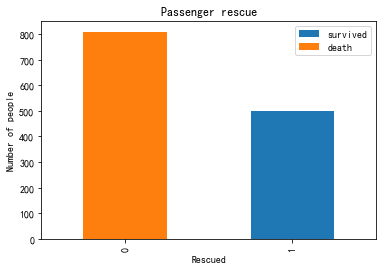

In [195]:
# Passenger rescue
survived = _titanic.survived[_titanic.survived==1].value_counts()
death = _titanic.survived[_titanic.survived==0].value_counts()
df = pd.DataFrame({u'survived':survived,u'death':death})
df.plot(kind = 'bar', stacked = True)
plt.title('Passenger rescue')
plt.xlabel('Rescued')
plt.ylabel('Number of people')
plt.show()

### Q1: This histogram shows the distribution of rescued and fatalities

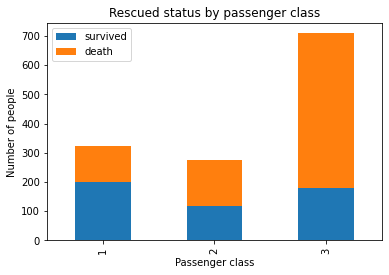

In [168]:
# Rescued status by passenger class
Survived_0 = _titanic.pclass[_titanic.survived == 0].value_counts() # 未获救
Survived_1 = _titanic.pclass[_titanic.survived == 1].value_counts() # 获救
df = pd.DataFrame({u'survived':Survived_1,u'death':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title('Rescued status by passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Number of people')
plt.show()

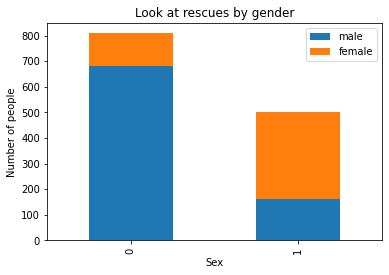

In [170]:
# Observe rescues based on gender
Survived_m = _titanic.survived[_titanic.sex == 'male'].value_counts()
Survived_f = _titanic.survived[_titanic.sex == 'female'].value_counts()
df = pd.DataFrame({u'male':Survived_m,u'female':Survived_f})
df.plot(kind = 'bar', stacked = True)
plt.title(u'Look at rescues by gender')
plt.xlabel(u'Sex')
plt.ylabel(u'Number of people')
plt.show()

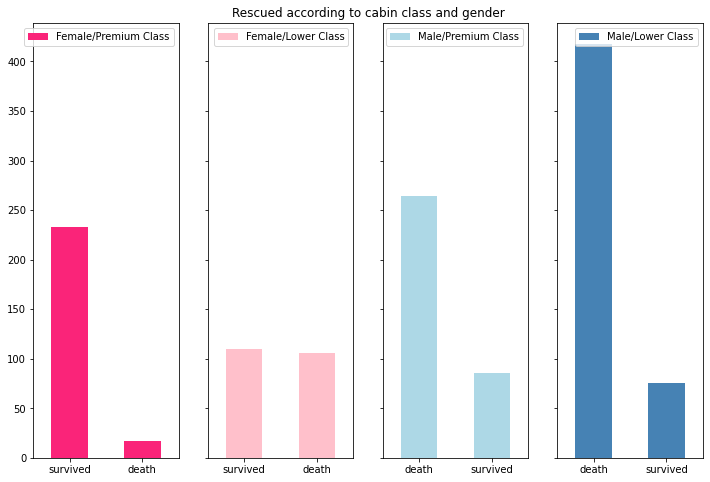

In [178]:
# Rescued according to cabin class and gender (the first and second classes are high-class cabins, and the third class is low-class cabins)
fig = plt.figure(figsize=(12, 8))
plt.title(u'Rescued according to cabin class and gender')
plt.axis('off')
ax1 = fig.add_subplot(141) # 将图像分为1行4列，从左到右从上到下的第1块
_titanic.survived[_titanic.sex == 'female'][_titanic.pclass != 3].value_counts().plot(kind = 'bar', label = 'female high class', color = '#FA2479')
ax1.set_xticklabels([u'survived',u'death'], rotation = 0) # 根据实际填写标签
ax1.legend([u'Female/Premium Class'], loc = 'best')

ax2 = fig.add_subplot(142, sharey = ax1) # 将图像分为1行4列，从左到右从上到下的第2块
_titanic.survived[_titanic.sex == 'female'][_titanic.pclass == 3].value_counts().plot(kind = 'bar', label = 'female low class', color = 'pink')
ax2.set_xticklabels([u"survived", u"death"], rotation=0)
plt.legend([u"Female/Lower Class"], loc='best')

ax3 = fig.add_subplot(143, sharey = ax1)
_titanic.survived[_titanic.sex == 'male'][_titanic.pclass != 3].value_counts().plot(kind = 'bar', label = 'male high class', color = 'lightblue')
ax3.set_xticklabels([u'death',u'survived'], rotation = 0)
plt.legend([u'Male/Premium Class'], loc = 'best')

ax4 = fig.add_subplot(144, sharey = ax1)
_titanic.survived[_titanic.sex == 'male'][_titanic.pclass == 3].value_counts().plot(kind = 'bar', label = 'male low class', color = 'steelblue')
ax4.set_xticklabels([u'death',u'survived'], rotation = 0)
plt.legend([u'Male/Lower Class'], loc = 'best')
plt.show()

### Obviously, the survival rate of women in the high-class cabin is higher than that in the low-class cabin, and the death rate of men in the low-class cabin is higher than that of the high-class cabin. Of the four cases, women in the upper class have the highest survival rate, and men in the lower class have the highest mortality rate.

<Figure size 432x288 with 0 Axes>

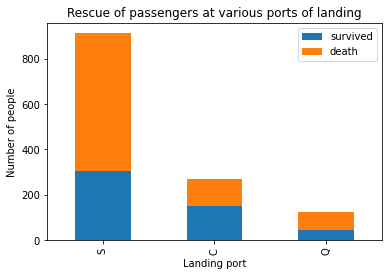

In [177]:
# Rescue of passengers at various ports of landing
fig = plt.figure()
fig.set(alpha = 0.2)
Survived_0 = _titanic.embarked[_titanic.survived == 0].value_counts()
Survived_1 = _titanic.embarked[_titanic.survived == 1].value_counts()
df = pd.DataFrame({u'survived':Survived_1,u'death':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title(u'Rescue of passengers at various ports of landing')
plt.xlabel(u'Landing port')
plt.ylabel(u'Number of people')
plt.show()

### According to the picture above, the relationship between the rescued situation and the port of embarkation is not strong. The rescue rate in Port C is higher.

In [185]:
passengerId = []
for i in range(len(_titanic['sibsp'])):
    passengerId.append(i)

_titanic['passengerId'] = passengerId
_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,passengerId
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1304
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1305
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1306
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1307


In [186]:
# How many cousins/sisters, children/parents are there, and their impact on rescue
g = _titanic.groupby(['sibsp','survived']) # Data grouping
df = pd.DataFrame(g.count()['passengerId'])
print (df)
g = _titanic.groupby(['parch','survived'])
df = pd.DataFrame(g.count()['passengerId'])
print (df)

                passengerId
sibsp survived             
0     0                 582
      1                 309
1     0                 156
      1                 163
2     0                  23
      1                  19
3     0                  14
      1                   6
4     0                  19
      1                   3
5     0                   6
8     0                   9
                passengerId
parch survived             
0     0                 666
      1                 336
1     0                  70
      1                 100
2     0                  56
      1                  57
3     0                   3
      1                   5
4     0                   5
      1                   1
5     0                   5
      1                   1
6     0                   2
9     0                   2


Text(0, 0.5, 'Number of people')

<Figure size 432x288 with 0 Axes>

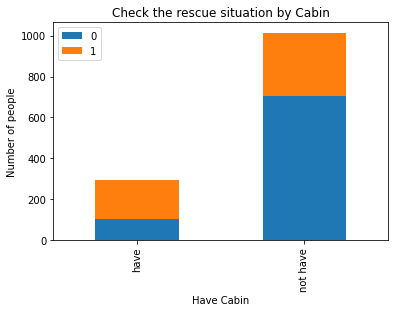

In [188]:
# Check the rescue situation by Cabin
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_cabin = _titanic.survived[pd.notnull(_titanic.cabin)].value_counts()
Survived_nocabin = _titanic.survived[pd.isnull(_titanic.cabin)].value_counts()
df = pd.DataFrame({u'have':Survived_cabin, u'not have':Survived_nocabin}).transpose()
df.plot(kind = 'bar', stacked = True)
plt.title(u'Check the rescue situation by Cabin')
plt.xlabel(u'Have Cabin')
plt.ylabel(u'Number of people')
plt.show()

### The rescue situation with cabin information is higher. However, the situation is complicated. For example, if the survivors go ashore and carry out information statistics, it will affect whether the information is related to the rescue situation.

In [189]:
# Verify the impact of the two eigenvalues of SibSp and Parch on inventory
_titanic[['sibsp','survived']].groupby(['sibsp'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,sibsp,survived
1,1,0.510972
2,2,0.452381
0,0,0.346801
3,3,0.300000
4,4,0.136364
5,5,0.000000
6,8,0.000000


In [190]:
_titanic[['parch','survived']].groupby(['parch'],as_index=False).mean()\
.sort_values(by='survived',ascending=False)

,parch,survived
3,3,0.625000
1,1,0.588235
2,2,0.504425
0,0,0.335329
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


Text(0, 0.5, 'Number of people')

C:\Users\14675\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\14675\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


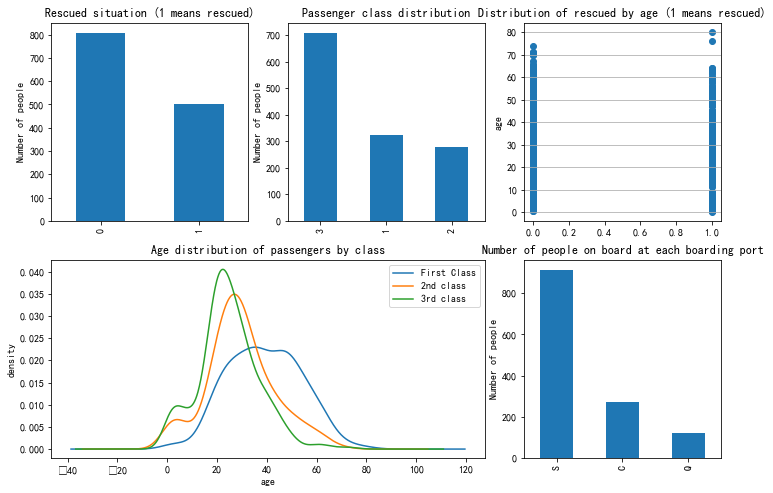

In [194]:
# Summary data
plt.rcParams['font.sans-serif']=['SimHei']

fig = plt.figure(figsize=(12, 8))
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
_titanic.survived.value_counts().plot(kind='bar')
plt.title(u'Rescued situation (1 means rescued)')
plt.ylabel(u"Number of people")

plt.subplot2grid((2,3),(0,1))
_titanic.pclass.value_counts().plot(kind='bar')
plt.title(u"Passenger class distribution")
plt.ylabel(u"Number of people")

plt.subplot2grid((2,3),(0,2))
plt.scatter(_titanic.survived,_titanic.age)
plt.ylabel(u"age")
plt.grid(b=True,which='major',axis='y')
plt.title(u"Distribution of rescued by age (1 means rescued)")

plt.subplot2grid((2,3),(1,0),colspan=2)
_titanic.age[_titanic.pclass==1].plot(kind='kde')
_titanic.age[_titanic.pclass==2].plot(kind='kde')
_titanic.age[_titanic.pclass==3].plot(kind='kde')
plt.xlabel(u"age")
plt.ylabel(u"density")
plt.title(u"Age distribution of passengers by class")
plt.legend((u'First Class', u'2nd class',u'3rd class'),loc='best') 

plt.subplot2grid((2,3),(1,2))
_titanic.embarked.value_counts().plot(kind='bar')
plt.title(u"Number of people on board at each boarding port")
plt.ylabel(u"Number of people")

# plt.show()

## titanic3 summary
Here I will answer my previous questions based on the above analysis:

1. What is the distribution of rescued and fatalities?
I answered this question visually in the first histogram.
2. What does the rescue rate have to do with?
The analysis shows that the rescue rate is related to gender, age, and wealth.
3. How is the rescue situation in each passenger compartment?
Higher-class cabins are more likely to be rescued.
4. What is the rescue situation for each gender?
The proportion of women rescued is greater than the proportion of men rescued.
5. According to cabin class and gender, what is the rescue situation?
High-class cabin women>low-class cabin women>high-class cabin men>low-class cabin men.
6. How is the passenger rescue situation at each landing port?
Passengers embarked as C have a higher rescue rate.
7. How about the rescue situation based on the cabin?
Passengers with cabins have a higher rescue rate.
8. Verify the impact of SibSp and Parch on survival?
After analysis, the influence of SibSp and Parch on survival rate is not very obvious.
9. Analysis of the overall rescue situation?
Has been shown in the final chart.
10. What kind of people are the easiest to survive?
Wealthy women.

## Dataset7: unigram_freq

### This data set is similar to the first data set and contains information on the number of occurrences of high-frequency words. We will mine this information.

- How often does the number one frequent word appear?

In [142]:
_unigram = pd.read_csv('data/unigram_freq.csv')
_unigram.head(10)

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698
5,in,8469404971
6,for,5933321709
7,is,4705743816
8,on,3750423199
9,that,3400031103


In [104]:
_unigram.describe()

,count
count,3.333330e+05
mean,1.764374e+06
std,6.629987e+07
min,1.271100e+04
25%,2.122400e+04
50%,4.151900e+04
75%,1.365760e+05
max,2.313585e+10


In [105]:
_unigram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333333 entries, 0 to 333332
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   word    333331 non-null  object
 1   count   333333 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.1+ MB


In [106]:
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud

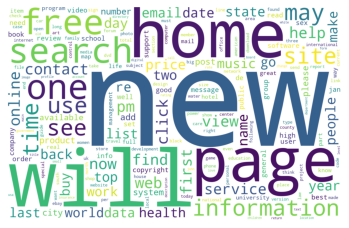

In [141]:
f = open('data/unigram_freq.txt','r',encoding='utf-8').read()

#生成一个词云对象
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(f)
# 绘制图片
plt.imshow(wordcloud)
# 消除坐标轴
plt.axis("off")
# 展示图片
plt.show()
# 保存图片
wordcloud.to_file('my_test2.png')

C:\Users\14675\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'counts')

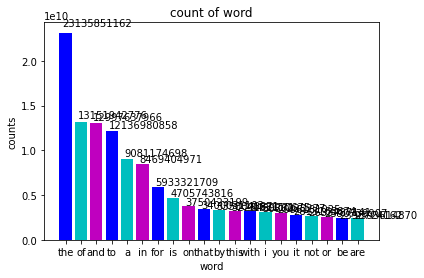

In [153]:
# 显示高度
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.2, 1.03*height, '%s' % int(height))
        
_unigram_1 = _unigram.head(20)
_7_label = _unigram_1['word']
_7_data = _unigram_1['count']
autolabel(plt.bar(_7_label,_7_data,color='bcm'))
plt.title('count of word')
plt.xlabel('word')
plt.ylabel('counts')

**We took the top 20 most frequent words for visualization, and found that the number of occurrences of the word was far greater than that of other words, and nearly doubled compared to the second place.**